**Computational Linear Algebra for Large Scale Problems**

**Principal Component Analysis (HW_PCA)**

**Fatemeh Ahmadvand**

**Student Number: s301384**

**Email:  fatemeh.ahmadvand@studenti.polito.it**

# Introduction:

In this project, I aim to use the Principal Component Analysis (PCA) to reduce the dimensionality of the problem on the following dataset "*cla4lsp_bikez_curated.csv*". Next, I applied the k-Means algorithm to find the significant motorcycle clusters.

# Import libraries

First of all, I start with the importation of the modules.

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Preparation (Setting the Random State)
## Set a seed for random  function

Before starting with the exercises, I initialize a random state variable **_rs_** equal to my ID student number.

I use the random state **_rs_** to set the **_numpy random seed_** at the beginning of the code and in every python functions I call during the exercises (if a random procedure is used).

\begin{align}
numpy.random.seed(rs)
\end{align}

In [2]:
student_number = 301384
rs = student_number
np.random.seed(rs)

# Exercise 1 (Loading and Preparing the Dataset)

I load the dataset **_"cla4lsp_bikez_curated.csv"_** as a pandas DataFrame.The dataset used in this homework is a preprocessed and cleansed version of a dataset extracted from *bikez.com on April 30th 2022*, using a custom scraper in order to enrich an existing used motorcycle dataset for a hackathon competition.

**(a)**

After loading the dataset, I store it in the variable **df_tot** the DataFrame obtained from the csv file.

In [3]:
# LOADING THE DATASET AS DATAFRAME
df_tot=pd.read_csv('cla4lsp22_bikez_curated.csv', encoding='latin-1')

# DISPLAY OF THE DATAFRAME
df_tot

,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Fuel system,Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,not given/unknown,single disc,single disc,other,other,not given/unknown,not given/unknown
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,other,not given/unknown,not given/unknown,other,other,not given/unknown,not given/unknown
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,not given/unknown,single disc,single disc,other,other,not given/unknown,not given/unknown
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,not given/unknown,single disc,single disc,other,other,not given/unknown,not given/unknown
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,other,not given/unknown,not given/unknown,other,other,not given/unknown,not given/unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,zÃ¼ndapp,z 22,1924,Sport,NaN,211.0,2.3,NaN,Single cylinder,two-stroke,...,NaN,NaN,NaN,carburettor,not given/unknown,not given/unknown,other,other,other,other
38468,zÃ¼ndapp,z 249,1923,Sport,NaN,249.0,2.8,NaN,Single cylinder,two-stroke,...,76.0,NaN,NaN,carburettor,expanding brake (drum brake),expanding brake (drum brake),other,other,other,other
38469,zÃ¼ndapp,z 249,1924,Sport,NaN,249.0,2.8,NaN,Single cylinder,two-stroke,...,76.0,NaN,NaN,carburettor,expanding brake (drum brake),expanding brake (drum brake),other,other,other,other
38470,zÃ¼ndapp,z 300,1928,Sport,NaN,298.0,26.0,NaN,Single cylinder,two-stroke,...,105.0,NaN,NaN,carburettor,expanding brake (drum brake),expanding brake (drum brake),other,other,not given/unknown,not given/unknown


**(b)**

I select a random integer r among 0, 1, 2, and create a sub-DFs **_workdf_**,  extracted from **_df_tot_**, such that it contains only data corresponding to years with reminder **_r_**,  if divided by three;

In [4]:
r = np.random.randint(0,3)
print('random r is equal to ' + str(r))

#I select the years whose remainder divided by 3 is equal to r and store it in workdf dataframe
workdf = df_tot[df_tot['Year'] % 3 == r]  

random r is equal to 0


**(c)**

As can be seen in the appendix A:

• labels: the columns Brand, Model, Year, Category, Rating;

• features: all the other ones.

I remove randomly from *workdf* two columns selected among the features: 
*Front/Rear breaks, Front/Rear tire, Front/Rear suspension*.

In [5]:
# Store the name of features in labels list
labels = ['Rear suspension', 'Rear tire', 'Rear brakes', 'Front suspension', 'Front tire', 'Front brakes']

In [6]:
# then I select two random integer between 0 and 6(excluded) as an index for selecting a label from labels list
to_remove = np.random.randint(0,6,size = 2)
print('The features that will be removed are : ' + str(labels[to_remove[0]]) +" - " +str( labels[to_remove[1]]))

The features that will be removed are : Front suspension - Front brakes


In [7]:
# remove selected features from data frame
workdf=workdf.drop([str(labels[to_remove[0]]), str(labels[to_remove[1]])], axis=1)

**(d)**

I clean the dataset *workdf* from missing values in the feature columns.
It should be noticed that for categorical data, sometimes the missing values can be interpreted as another category. This is useful in particular when, e.g., the rows with missing values are too much to be removed.

I look for the total number of unavailable data (missing values) in each column:

In [8]:
#returns the columns in our Pandas dataframe along with the number of missing values detected in each one
workdf.isna().sum()

Brand                     0
Model                    10
Year                      0
Category                  0
Rating                 6361
Displacement (ccm)      339
Power (hp)             4455
Torque (Nm)            7732
Engine cylinder           0
Engine stroke             0
Gearbox                   0
Bore (mm)              3368
Stroke (mm)            3368
Fuel capacity (lts)    2583
Fuel control              0
Cooling system            0
Transmission type         0
Dry weight (kg)        5731
Wheelbase (mm)         4513
Seat height (mm)       5058
Fuel system               0
Rear brakes               0
Front tire                0
Rear tire                 0
Rear suspension           0
dtype: int64

As you can see, the number of missing values in some columns is very high, so I manually omit these columns.

In [9]:
workdf=workdf.drop(['Rating','Displacement (ccm)','Power (hp)','Torque (Nm)',
'Bore (mm)','Stroke (mm)','Fuel capacity (lts)',
'Dry weight (kg)','Wheelbase (mm)','Seat height (mm)'], axis=1)

After that, I remove the rows that contains NULL values(missing values) from the dataset.

In [10]:
workdf.dropna(inplace=True)

Now let's have a look at the dataset.

In [11]:
workdf

,Brand,Model,Year,Category,Engine cylinder,Engine stroke,Gearbox,Fuel control,Cooling system,Transmission type,Fuel system,Rear brakes,Front tire,Rear tire,Rear suspension
1,acabion,gtbo 55,2007,Sport,In-line four,four-stroke,6-speed,Not Given/Unknown,Liquid,Not Given/Unknown,other,not given/unknown,other,other,not given/unknown
4,acabion,gtbo 70,2007,Prototype / concept model,In-line four,four-stroke,6-speed,Not Given/Unknown,Liquid,Not Given/Unknown,other,not given/unknown,other,other,not given/unknown
6,access,ams 3.20 supercross,2016,ATV,Single cylinder,four-stroke,Automatic,Overhead Valves (OHV),Air,Chain,carburettor,single disc,other,other,not given/unknown
7,access,ams 4.30 supermoto efi,2016,ATV,Single cylinder,four-stroke,Automatic,Overhead Cams (OHC),Air,Chain,efi. injection,single disc,other,other,not given/unknown
8,access,ams 4.38 sm gear shift,2016,ATV,Single cylinder,four-stroke,5-speed,Overhead Cams (OHC),Air,Chain,carburettor,single disc,other,other,not given/unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38459,zÃ¼ndapp,roller super,1968,Scooter,Single cylinder,two-stroke,Not Given/Unknown,Not Given/Unknown,Air,Not Given/Unknown,carburettor. other,expanding brake (drum brake),other,other,not given/unknown
38462,zÃ¼ndapp,z 2 g,1923,Sport,Single cylinder,two-stroke,2-speed,Not Given/Unknown,Air,Belt,carburettor,not given/unknown,other,other,other
38466,zÃ¼ndapp,z 22,1923,Sport,Single cylinder,two-stroke,Not Given/Unknown,Not Given/Unknown,Air,Belt,carburettor,not given/unknown,other,other,other
38468,zÃ¼ndapp,z 249,1923,Sport,Single cylinder,two-stroke,3-speed,Not Given/Unknown,Air,Belt,carburettor,expanding brake (drum brake),other,other,other


# Exercise 2 (Encoding of Categorical Data):

I assess the *workdf* and get it ready for the **PCA**. Due to the fact that all current columns include categorical data, I use the **LabelEncoder** function to transform the values, fit the function to the column, and then swap the new column for the old one.

In [12]:
# encoding the all categorical colunms 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in workdf.columns:
    label_name = i
    x = workdf[label_name]
    y = label_encoder.fit_transform(x)
    workdf.insert(4,str(label_name)+"2",y)
    workdf.drop(label_name,axis=1,inplace=True)

for instance, You can see the new values of the Model column. I did exactly the same thing for other categorical columns via For loop.

I store into a variable **_Xworkdf_** the sub-DF obtained from workdf selecting the feature columns (updated to the new encoding).

In [13]:
Xworkdf = workdf

# now lets have  a look at the new dataset
Xworkdf

,Brand2,Model2,Year2,Category2,Rear suspension2,Rear tire2,Front tire2,Rear brakes2,Fuel system2,Transmission type2,Cooling system2,Fuel control2,Gearbox2,Engine stroke2,Engine cylinder2
1,0,4061,37,12,6,5,9,34,7,2,1,5,11,0,5
4,0,4062,37,9,6,5,9,34,7,2,1,5,11,0,5
6,1,1066,40,0,6,5,9,36,0,1,0,7,13,0,10
7,1,1067,40,0,6,5,9,36,3,1,0,6,13,0,10
8,1,1068,40,0,6,5,9,36,0,1,0,6,9,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38459,480,6596,24,10,6,5,9,15,1,2,0,5,14,1,10
38462,480,9872,9,12,7,5,9,34,0,0,0,5,3,1,10
38466,480,9874,9,12,7,5,9,34,0,0,0,5,14,1,10
38468,480,9875,9,12,7,5,9,15,0,0,0,5,5,1,10


# Exercise 3 (Preprocessing and PCA): 

**(a)**

I use *StandardScaler* and *MinMaxScalar* to scale the dataset.

**sklearn.preprocessing.MinMaxScaler:** This scaler transform the data such that the values of each column are distributed between a **min. value $m$** and a **max. value $M$**.

let $x_{min} , x_{max} ∈ \mathbb{R}^{n}$ be the vectors of minimum and maximum values of the features, respectively; then

$$
S^\prime = \Bigg( S- 
\begin{bmatrix}
x_{min}^T\\
\vdots\\
x_{min}^T
\end{bmatrix}
\Bigg) \frac..
\begin{bmatrix}
x_{max}-x_{min} \\
\vdots \\
x_{max}-x_{min} \\
\end{bmatrix} . (M-m) + m
$$
all the operations are intended to be element-wise.

**MinMaxScaler(feature_range = (0, 1))** will transform each value in the column proportionally within the range $[0,1]$.
I use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).
therefore, I scale the features with **_MinMaxScaler_** and transform these values and then fit the dataframe and store it to the new dataframe **Xworkdf_mm**.

In [14]:
from sklearn import preprocessing

Scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

#Fit to dataframe, then transform it.
Xworkdf_mm = Scaler.fit_transform (Xworkdf)  
Xworkdf_mm = pd.DataFrame(Xworkdf_mm) 

Then I Scale the features with **StandarScaler**. Standardization is the most commonly used data preprocessing method prior to PCA, primarily because it is equivalent to performing the PCA with the correlation matrix of the data C(S) (rather than the covariance matrix V(S)).

**sklearn.preprocessing.StandardScaler:** it is a sklearn class for standardizing data. i.e., all the data are
re-centered and the st.dev. is normalized.

Given a data matrix $S$, the scaler compute the mean $µ(S)$ and/or the std dev. $σ(S)$.
Then, for each $X, Y ∈ \mathbb{R}^{K\times n}$ it can make the following transformations.
    
**z-normalization:**
$$
X\mapsto 
\begin{bmatrix}
(x_1^T-\mu^T(S))\frac.. &  & \sigma^T(S) \\
\vdots &  & \vdots \\
(x_K^T-\mu^T(S))\frac.. &  & \sigma^T(S) \\
\end{bmatrix}
$$
all the operations are intended to be element-wise.

In [15]:
from sklearn.preprocessing import StandardScaler
#import numpy as np

scaler = StandardScaler()
Xworkdf_std = scaler.fit_transform(Xworkdf)
Xworkdf_std = pd.DataFrame(Xworkdf_std )

**(b)**

Now lets Compare the values of *variance* for three datasets, **Xworkdf , Xworkdf_std , and Xworkdf_mm**

In [16]:
Xworkdf_mm.var()

0     0.081294
1     0.083480
2     0.024286
3     0.073863
4     0.013832
5     0.036369
6     0.056248
7     0.051631
8     0.118346
9     0.081455
10    0.072178
11    0.071219
12    0.028930
13    0.007111
14    0.031801
dtype: float64

In [17]:
Xworkdf_std.var()

0     1.000073
1     1.000073
2     1.000073
3     1.000073
4     1.000073
5     1.000073
6     1.000073
7     1.000073
8     1.000073
9     1.000073
10    1.000073
11    1.000073
12    1.000073
13    1.000073
14    1.000073
dtype: float64

In [18]:
Xworkdf.var()

Brand2                1.873010e+04
Model2                8.441781e+06
Year2                 4.284005e+01
Category2             2.134652e+01
Rear suspension2      1.991868e+00
Rear tire2            9.092220e-01
Front tire2           4.556073e+00
Rear brakes2          1.396093e+02
Fuel system2          5.798937e+00
Transmission type2    7.330914e-01
Cooling system2       6.496065e-01
Fuel control2         1.395890e+01
Gearbox2              5.670302e+00
Engine stroke2        5.760259e-01
Engine cylinder2      1.272055e+01
dtype: float64

As you can see, *Xworkdf* has a **higher** variance of features than the other two.
The variance for all features is the same for standard scalar (*Xworkdf_std*), which is **normal**, whereas the variance for MinMaxScaler (*Xworkdf_mm*) is significantly **lower** in comparison to the original data.

The variance of the data is too high if feature scaling is not performed on our original dataset, so feature scaling must be performed using either a standard scaler or a min-max scaler.

**(c)** 

In this step, I apply the full PCA to the **Xworkdf**.

In [19]:
from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit_transform(Xworkdf)

array([[-9.65034560e+02,  2.40050218e+02, -5.89303679e+00, ...,
         4.01607294e-01, -8.91136539e-02, -9.47031008e-01],
       [-9.64034564e+02,  2.40057998e+02, -5.83672286e+00, ...,
         3.91852214e-01, -4.44403156e-02, -9.46983605e-01],
       [-3.95993904e+03,  2.16255560e+02, -8.13505767e+00, ...,
        -2.81548648e-01, -9.88217443e-01, -3.87052076e-01],
       ...,
       [ 4.85144843e+03, -1.95539429e+02, -3.44539228e+00, ...,
        -1.12220918e+00, -3.66010656e-01,  7.18261854e-01],
       [ 4.85244797e+03, -1.95622135e+02,  1.53421210e+01, ...,
        -1.01822995e+00,  4.85481043e-01,  7.16013686e-01],
       [ 4.85844811e+03, -1.95586856e+02,  1.51281863e+01, ...,
        -4.17069965e-01, -4.94070437e-01,  6.72646621e-01]])

The cumulative explained variance and component-wise variance are shown in the figures below.

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

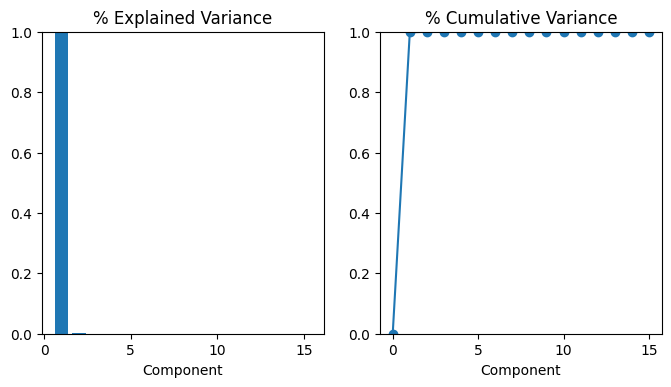

In [20]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca1)

The diagram depicts the amount of variance distribution of the main data based on the number of components. Since the variance of our original data is high; according to the graph, I must keep all of the components in order to cover the variance of the original data.

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

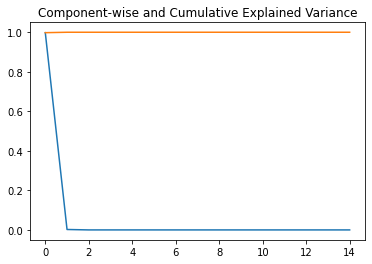

In [21]:
plt.plot(range(15), pca1.explained_variance_ratio_)
plt.plot(range(15), np.cumsum(pca1.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

The above graph shows the Component-wise Change Process as well as the Cumulative Explained Variance as distributed by PCA.
Since this is for the original data and our data has a high variance, I should keep the entire PCA, so applying PCA has no effect. The full PCA is then applied to **Xworkdf_std**.

In [22]:
from sklearn.decomposition import PCA

pca2 = PCA()
pca2.fit_transform(Xworkdf_std)

array([[ 0.30412779, -1.48997024,  1.35606138, ..., -1.24203425,
        -0.76665531, -1.5867558 ],
       [ 0.11057513, -1.36674445,  1.26156772, ..., -1.10189256,
        -0.77074636, -1.6724934 ],
       [-0.33146405,  0.90311647, -0.62998836, ..., -1.36237741,
        -0.68840589,  0.02025642],
       ...,
       [ 0.09096407,  1.74618006,  1.10333606, ...,  2.04202299,
        -0.36794655,  0.1339286 ],
       [-1.41582888,  2.5422434 ,  1.7629626 , ...,  2.56079023,
         0.5068248 , -0.41824318],
       [-0.35842851,  2.41962858,  1.53446196, ...,  1.28585867,
        -0.49443335,  0.35116343]])

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

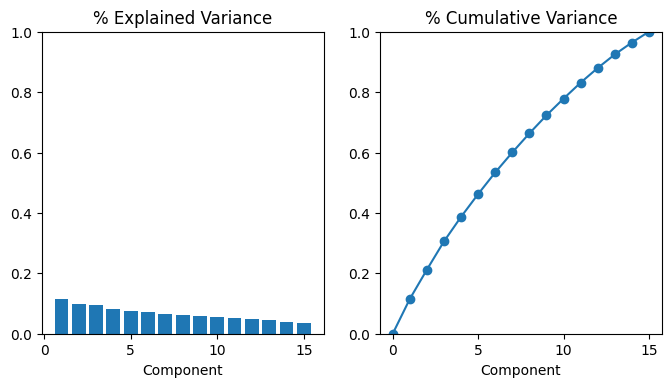

In [23]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca2)

I draw PCA graphs after applying it on *Xworkdf_std*. For example, in graphs *Explained Variance* and *Cumulative Variance*, the first 5 components of PCA cover nearly 40% of the variance of data, which is the 35% mentioned in the next question.
PCA1 covers about 15% of the variance in the graph *Explained Variance*, and I can see a decrease in PCA. In order to reduce the variance, the importance of PCAs must be reduced(PCA1>PCA2>PCA3 ...).

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

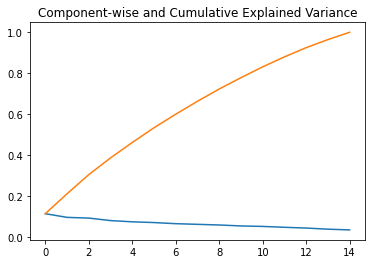

In [24]:
plt.plot(range(15), pca2.explained_variance_ratio_)
plt.plot(range(15), np.cumsum(pca2.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

This graph shows that 4 PCA accounts for approximately 40% of the variance. In fact, this chart is a hybrid of the two above.

Finally, I perform a full PCA on **Xworkd_mm**.

In [25]:
from sklearn.decomposition import PCA
pca3 = PCA()
pca3.fit_transform(Xworkdf_mm)

array([[-0.589126  , -0.40829855,  0.17906712, ...,  0.00686805,
         0.03755687, -0.11272396],
       [-0.55830119, -0.37298324,  0.27580071, ...,  0.01635513,
         0.04014721, -0.113105  ],
       [ 0.60203718, -0.47270134,  0.43204986, ..., -0.14014758,
         0.09777576, -0.04269993],
       ...,
       [ 0.45189789,  0.47964653, -0.56987368, ...,  0.56609336,
        -0.10674031,  0.06196393],
       [ 0.47748061,  0.55176055, -0.4330435 , ...,  0.5802536 ,
        -0.13017946,  0.06065914],
       [ 0.45362821,  0.62413078, -0.3107465 , ...,  0.44739614,
        -0.01981297,  0.06385427]])

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

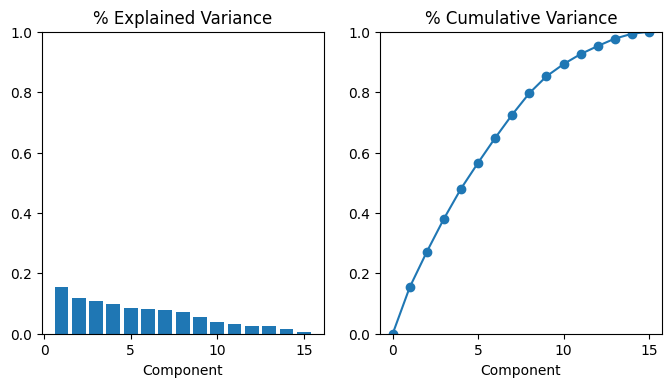

In [26]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca3)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

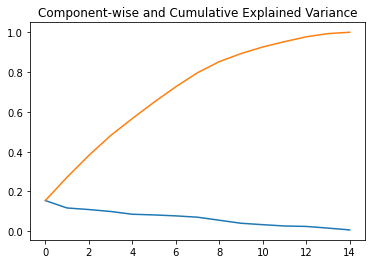

In [27]:
plt.plot(range(15), pca3.explained_variance_ratio_)
plt.plot(range(15), np.cumsum(pca3.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

PCA graphs are produced after being applied to *Xworkdf_mm*. I can see that the three graphs mentioned above resemble *Xworkdf_std*.

# Exercise 4 (Dimensionality Reduction and Interpretation of the PCs):

Now I apply the PCA with respect to the given condition(m>=3). 
As previously stated, up to three PCAs are sufficient to cover up to 35% of the variance. I used three PCAs on the datasets *Xworkdf_std* and *Xworkdf_mm*, and the results are shown in the tables.
Then I draw the same three graphs for the whole data (*Explained Variance*, *Cumulative Variance*, and *Component-wise and Cumulative Explained Variance*), but this time for three PCAs, which show variance between 35 and 40%.

**pca1: Explained Variance -Cumulative Variance**

In [28]:
# INITIALIZE THE PCA
m = 3
pca1 = PCA(n_components=m)

# FIT THE PCA
X1_pca=pca1.fit_transform(Xworkdf_mm)
component_names = [f"PC{i+1}" for i in range(X1_pca.shape[1])]
X1_pca = pd.DataFrame(X1_pca, columns=component_names)

X1_pca.head()

,PC1,PC2,PC3
0,-0.589128,-0.408283,0.179066
1,-0.558303,-0.372966,0.275800
2,0.602030,-0.472637,0.432044
3,0.197454,-0.483838,0.450159
4,0.578496,-0.471604,0.460438


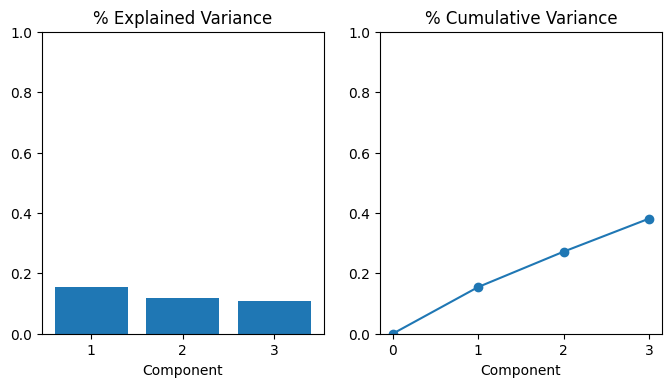

In [29]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    # MAKE THE BARPLOT
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca1);

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

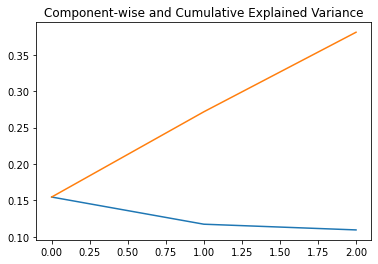

In [30]:
plt.plot(range(3), pca1.explained_variance_ratio_)
plt.plot(range(3), np.cumsum(pca1.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

now I use it for the *Xworkdf_std*

**pca2: Explained Variance -Cumulative Variance**

In [31]:
pca2 = PCA(3)
X2_pca=pca2.fit_transform(Xworkdf_std)
component_names = [f"PC{i+1}" for i in range(X2_pca.shape[1])]
X2_pca = pd.DataFrame(X2_pca, columns=component_names)

X2_pca.head()

,PC1,PC2,PC3
0,0.297920,-1.515118,1.394712
1,0.102435,-1.393955,1.302839
2,-0.342363,0.897330,-0.623374
3,-0.339078,0.288112,-0.274431
4,-0.889377,0.820926,-0.363539


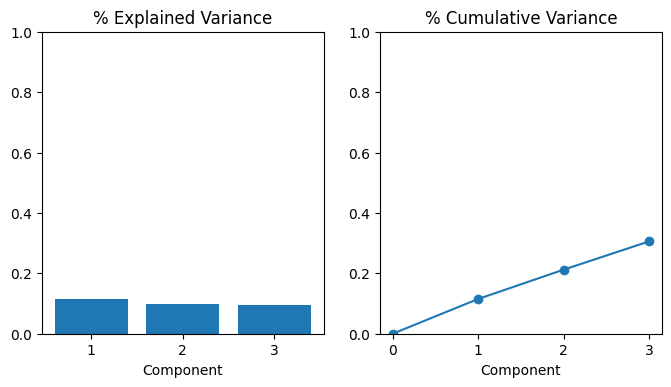

In [32]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca2);

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

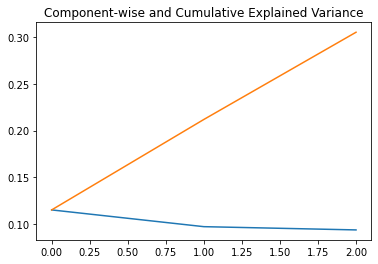

In [33]:
plt.plot(range(3), pca2.explained_variance_ratio_)
plt.plot(range(3), np.cumsum(pca2.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

With respect to the given plots and tables I can see that first three PCA's are sufficient for covering the 35% of total variance.

# Exercise 5 (k-Means): 

I apply the "PC-space" to the two DFs and run the k-Means algorithm on them. I want to use the silhouette coefficient to choose the optimal value for $k ∈ {3, . . . , 10} ⊂ N$.

therefore, I apply the k-means for the *Xworkdf_mm* with the given PC-space above which is *X1_pca*

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X1_pca)

KMeans(n_clusters=2, random_state=0)

In [35]:
kmeans.cluster_centers_

array([[-0.28282929, -0.0090181 ,  0.01234155],
       [ 0.37649448,  0.01200464, -0.01642873]])

In cluster analysis, the **Elbow Method** is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

I use the Elbow method to find out the best possible number of clusters.

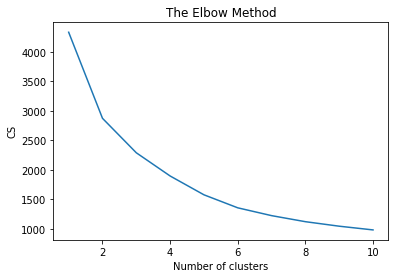

In [36]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1_pca)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**Silhouette Coefficient:** is calculated using the mean intra-cluster distance $(a)$ and the mean nearest-cluster distance $(b)$ for each sample. The Silhouette Coefficient for a sample is defined as the below formula. To clarify, $b$ is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is $2 <= n_{labels} <= n_{samples} - 1$. 

The best value is 1 and the worst value is $-1$. Values near $0$ indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

for each $x ∈ S$, s.t. $x ∈ V_i$, it is defined

$$
s(x):=\frac{b(x)-a(x)}{max\{a(x),b(x)\}}\ 
$$

In [37]:
from sklearn.metrics import silhouette_score
silhoutte_coefficient=[]
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [38]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(X1_pca)
        score=silhouette_score(X1_pca,kmeans.labels_)
        silhoutte_coefficient.append(score)

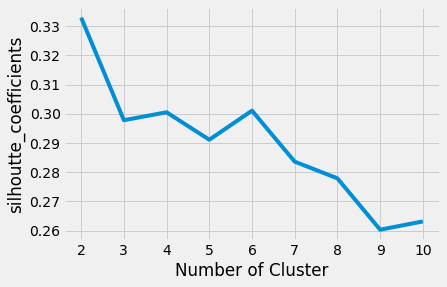

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhoutte_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("silhoutte_coefficients")
plt.show()

According to the Elbow technique graphic, four clusters are the ideal number to use when clustering my data. According to the silhouette method The question is about selecting the ideal number of clusters, which might be either 4 or 6. Since the Elbow approach chose 4 as the ideal number, I also take the answer 4 into consideration for silhouette.

In the next step, I apply the exact same functions for the second dataset.(*Xworkdf_std*)

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X2_pca)

KMeans(n_clusters=2, random_state=0)

In [41]:
kmeans.cluster_centers_

array([[-0.89289194,  0.74163719,  0.01163123],
       [ 0.69456188, -0.57690399, -0.00904769]])

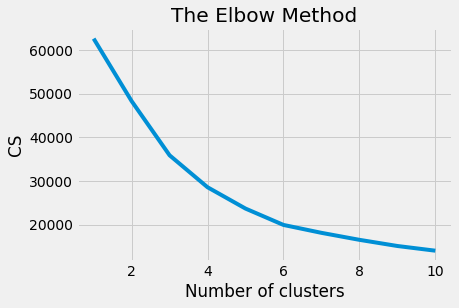

In [42]:
# I use the Elbow method to find out the best possible number of clusters

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X2_pca)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

silhoutte_coefficient=[]
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [44]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(X2_pca)
        score=silhouette_score(X2_pca,kmeans.labels_)
        silhoutte_coefficient.append(score)

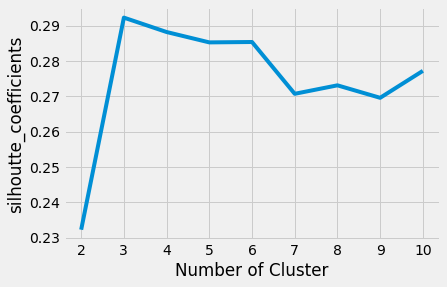

In [45]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhoutte_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("silhoutte_coefficients")
plt.show()

For the second dataset, I checked the number of clusters once more, and in this case, 4 is a good choice because it has a high coefficient. Therefore, I choose to separate it into 4 clusters.

# Exercise 6 (Clusters and Centroid Interpretation and Visualization):

On the first dataset *Xworkdf_mm*, I cluster the data. We will take into account PC1 and PC2 and input their values into x1 in accordance with the identical PCAs that we have already specified. Kmeans are called, and X1 is fit. In order to display centroid 1 in the diagram later, we also divide the centroids using the kmeans algorithm. I create the plot. 

In [46]:
X1=X1_pca

In [47]:
X1 = X1[['PC1','PC2']].iloc[: , :].values


In [48]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [49]:
labels1.shape

(13663,)

In [50]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

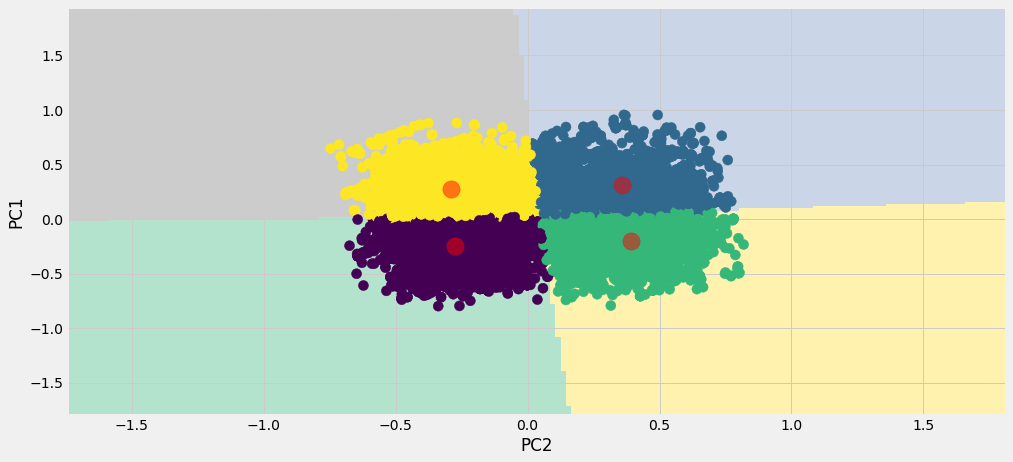

In [51]:
plt.figure(1 , figsize = (15 , 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1', y = 'PC2', data = X1_pca, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()


For the second dataset *Xworkdf_std*, I use the same procedure.

In [52]:
X2=X2_pca

In [53]:
X2 = X2[['PC1','PC2']].iloc[: , :].values


In [54]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [55]:
labels1.shape

(13663,)

In [56]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

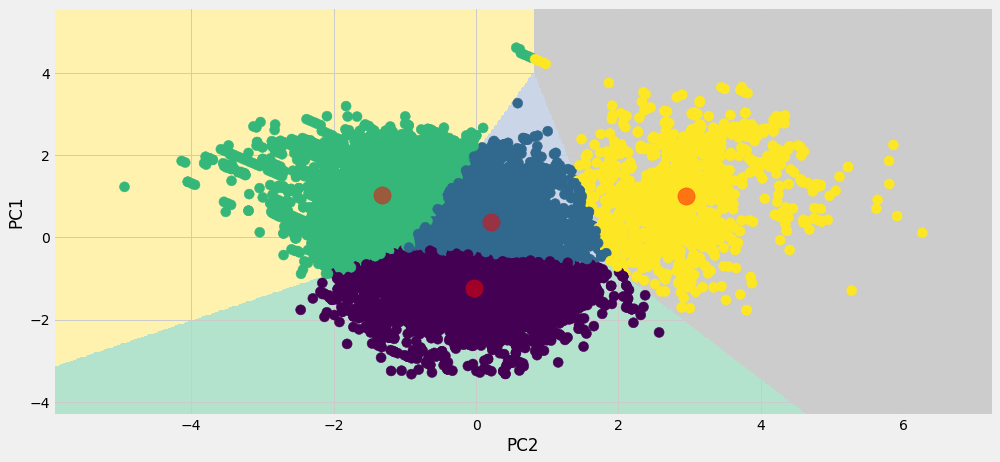

In [57]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1', y = 'PC2', data = X2_pca, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()


#  Exercise 7 - Optional (Clusters and Centroids Evaluation)

Since there is no "concrete" aim, it is particularly difficult to evaluate the results of a clustering process. There are typically two major methods:

   1.**External evaluation:** if the data are labeled, the final clusters are analyzed with respect to the labels of the data inside them.
   
   **calinski_harabasz_score:** The score is defined as ratio of the sum of between the within-cluster dispersion and the between-cluster dispersion for all clusters.

If the ground truth labels are not known which is our case , the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.
   
   2.**Internal evaluation:**  These methods measure how much the clustering result produces clusters with high similarity within each cluster and low similarity between clusters.

Some of the most used internal evaluation methods for clustering are:

**Davies-Bouldin index:**

$$
\boldsymbol{DB} := \frac{\boldsymbol{1}}{\boldsymbol{k}} \sum_{i=1}^{k} max_{j\ne i} \frac{\boldsymbol{{d}_{v_i}^{avg}} + \boldsymbol{{d}_{v_j}^{avg}}}{\boldsymbol{|| w_i,w_j ||}}
$$

where k is the number of clusters, $w_i$ is the centroid of cluster $i$, $\boldsymbol{{d}_{v_i}^{avg}}$ is the average distance of all elements in cluster $i$ to centroid $w_i$ and $\boldsymbol{|| w_i,w_j ||}$ is the distance between centroids $w_i$ and $w_j$ Since algorithms that produce clusters with low intra-cluster distances (high intra-cluster similarity) and high inter-cluster distances (low inter-cluster similarity) will have a low *Davies–Bouldin index*, the clustering algorithm that produces a collection of clusters with the smallest *Davies-Bouldin index* is considered the best algorithm based on this criterion.

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.


**Silhouette Coefficient:** is calculated using the mean intra-cluster distance $(a)$ and the mean nearest-cluster distance $(b)$ for each sample. The Silhouette Coefficient for a sample is defined as the below formula. To clarify, $b$ is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is $2 <= n_{labels} <= n_{samples} - 1$. 

The best value is 1 and the worst value is $-1$. Values near $0$ indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

for each $x ∈ S$, s.t. $x ∈ V_i$, it is defined

$$
s(x):=\frac{b(x)-a(x)}{max\{a(x),b(x)\}}\ 
$$

In [58]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

I apply them on the first dataset which is Xworkdf_mm

In [59]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(X1_pca)

In [60]:
calinski_harabasz_coefficient=[]
score=calinski_harabasz_score(X1_pca,kmeans.labels_)
calinski_harabasz_coefficient.append(score)

In [61]:
results = {}
# calculate the number of clusters according to the Calinski-Harabasz Index
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels = kmeans.fit_predict(X1_pca)
    db_index = calinski_harabasz_score(X1_pca,kmeans.labels_)
    results.update({i: db_index})

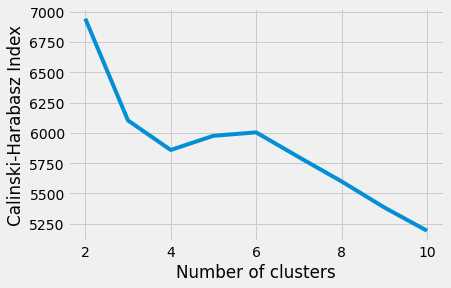

In [62]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [63]:
results = {}
# calculate the number of clusters according to davies_bouldin_score
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels = kmeans.fit_predict(X1_pca)
    db_index = davies_bouldin_score(X1_pca,kmeans.labels_)
    results.update({i: db_index})

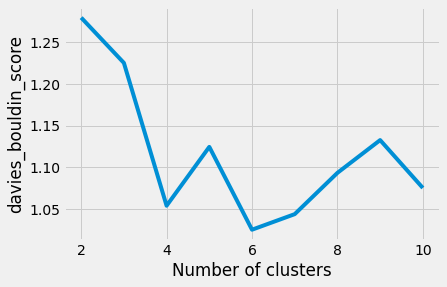

In [64]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("davies_bouldin_score")
plt.show()

As can be seen, the calinski harabasz score for clusters 4,5 and 6 is appropriate for this dataset. Additionally, The  Davies_Bouldin_score has the minimal score, which is the best situation, is for 6 clusters.

I have to choose between having 4 or 6 clusters, so maybe choosing n = 5 will give me the best results for both the Davis and the Calinski methods, then I applied them on *Xworkdf_std*.

In [65]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(X2_pca)
        

In [66]:
calinski_harabasz_coefficient=[]
score=calinski_harabasz_score(X2_pca,kmeans.labels_)
calinski_harabasz_coefficient.append(score)


In [67]:
results = {}
# calculate the number of clusters according to the Calinski-Harabasz Index
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels = kmeans.fit_predict(X2_pca)
    db_index = calinski_harabasz_score(X2_pca,kmeans.labels_)
    results.update({i: db_index})

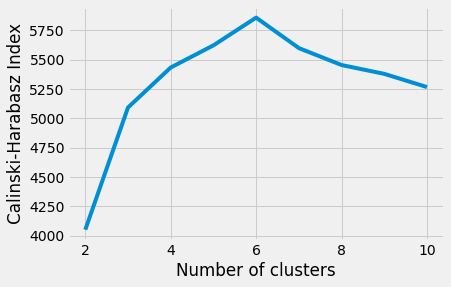

In [68]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [69]:
results = {}
# calculate the number of clusters according to davies_bouldin_score
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels = kmeans.fit_predict(X2_pca)
    db_index = davies_bouldin_score(X2_pca,kmeans.labels_)
    results.update({i: db_index})

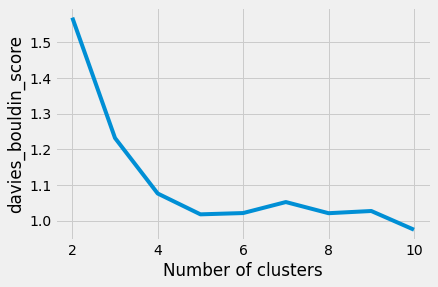

In [70]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("davies_bouldin_score")
plt.show()

I look at how their scores can be adjusted using the two functions I have. One Davies Bouldins and one Calinski Harabasz.
With Davies Bouldins, I created the graphs, and I can see that there are 4 clusters, which is a good quantity for me.
I observe that the number 6 is a decent number of clusters for Calinski Harabasz, however the number 4 is also suitable.